<font size="5">**This script shows how to create custom sharpening functions using the Thunmpy package.**<font>

Detailed information on super-resolution methods can be found in Granero-Belinchon, C.; Michel, A.; Lagouarde, J.-P.; Sobrino, J.A.; Briottet, X. Multi-Resolution Stufrom osgeo import gdal
import numpy as np
import matplotlib.pyplot as pltdy of Thermal Unmixing Techniques over Madrid Urban Area: Case Study of TRISHNA Mission. Remote Sens. 2019, 11, 1251. https://doi.org/10.3390/rs11101251 

Each sharpening methodology contains 3 steps: 1) fit, 2) unmixing and 3) residual correction. So, three functions from Thunmpy are needed, one for fit, other for unmixing and the last one for residual correction. Each function contains some explanation of the needed inputs and outputs. Not all the functions can be combined.

In [1]:
# Loading Packages
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

<font size="3">**1. Custom sharpening function**<font>
    
Here we develop a sharpening methodology with bilinear fit and quality correction based on coarse resolution LST average and with threshold in the accepted maximum and minimum LSTs.

We start by loading the needed data, i.e. a) coarse resolution LST, coarse resolution VNIR-SWIR index and high resolution VNIR-SWIR index

In [ ]:
################### Paths to files #################################

path_index_h = 'Images/NDBI_20m.img'
path_index_c = 'Images/NDBI_100m.img'
path_index2_h = 'Images/Albedo_20m.img'
path_index2_c = 'Images/Albedo_100m.img'
path_temperature_c = 'Images/LST_100m.img'

################### Index H ##########################################
    
# Reading index data
filename = path_index_h
dataset = gdal.Open(filename)
cols = dataset.RasterXSize #Spatial dimension x
rows = dataset.RasterYSize #Spatial dimension y
    
# Read as array the index
I_H = dataset.ReadAsArray(0, 0, cols, rows).astype(np.float)
    
################### Temperature ######################################
    
# Reading temperature data
filename = path_temperature_c
dataset = gdal.Open(filename)
cols = dataset.RasterXSize #Spatial dimension x
rows = dataset.RasterYSize #Spatial dimension y
    
# Read as array
T_C= dataset.ReadAsArray(0, 0, cols, rows).astype(np.float)

################### Index C ##########################################

# Reading index data
filename = path_index_c
dataset = gdal.Open(filename)
cols = dataset.RasterXSize #Spatial dimension x
rows = dataset.RasterYSize #Spatial dimension y

# Read as array the index
I_C = dataset.ReadAsArray(0, 0, cols, rows).astype(np.float)

################### Index 2 H ##########################################
    
# Reading index data
filename = path_index2_h
dataset = gdal.Open(filename)
cols = dataset.RasterXSize #Spatial dimension x
rows = dataset.RasterYSize #Spatial dimension y
    
# Read as array the index
I2_H = dataset.ReadAsArray(0, 0, cols, rows).astype(np.float)

################### Index 2 C ##########################################

# Reading index data
filename = path_index2_c
dataset = gdal.Open(filename)
cols = dataset.RasterXSize #Spatial dimension x
rows = dataset.RasterYSize #Spatial dimension y

# Read as array the index
I2_C = dataset.ReadAsArray(0, 0, cols, rows).astype(np.float)

1) **Fit step**

In [4]:
from Thunmpy import ThunmFit
min_T = 285 # Minimum LST taken into account in fit
path_fit = False # Path to txt file containing fit parameters

fit_param=ThunmFit.bilinear_fit(I_C, I2_C, T_C, min_T, path_fit)  # fit contains the fit parameters in this case slope and intercept of the bilinear fit.

Fit Done


2) **Unmixing step**

In [5]:
from Thunmpy import Thunmixing

iscale=5   # Upscaling ratio
path_mask=0 # No mask used in unmixing

T_unm=Thunmixing.bilinear_unmixing(I_H, I2_H, T_C, fit_param, iscale, path_mask)

Unmixing Done


3) **Correction step**

In [6]:
from Thunmpy import Thunmcorr

iscale=5   # Upscaling ratio
max_thres=323 # max LST accepted in residual correction
min_thres=273 # min LST accepted in residual correction

T_H_corrected=Thunmcorr.quality_correction(T_C, T_unm, iscale, max_thres, min_thres)

Correction Done


**Plot**

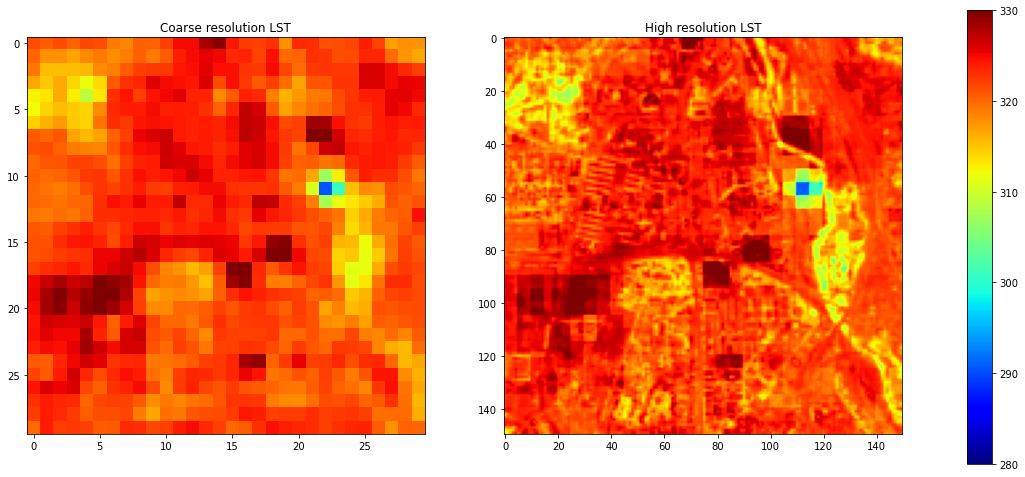

In [7]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(18, 9))

ax0.set_title('Coarse resolution LST')
ax0.imshow(T_C, vmin=280, vmax=330, cmap='jet')

ax1.set_title('High resolution LST')
img=ax1.imshow(T_H_corrected, vmin=280, vmax=330, cmap='jet')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar=fig.colorbar(img, cax=cbar_ax)

plt.show()